# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2021

## Homework 6 - Solutions
Due Wednesday, March 3

In [1]:
using LinearAlgebra, PyPlot

### Problem 1 - Hilbert matrices

A *Hilbert matrix* $H$ of size $n$-by-$n$ has entries

$$
H_{ij} = \frac{1}{i + j - 1}
$$

#### Problem 1(a)

Create a 2D array with a Hilbert matrix $H$ of size $n=6$.

In [2]:
H = [(1/(i+j-1)) for i = 1:6, j = 1:6]

6×6 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2       0.166667
 0.5       0.333333  0.25      0.2       0.166667  0.142857
 0.333333  0.25      0.2       0.166667  0.142857  0.125
 0.25      0.2       0.166667  0.142857  0.125     0.111111
 0.2       0.166667  0.142857  0.125     0.111111  0.1
 0.166667  0.142857  0.125     0.111111  0.1       0.0909091

#### Problem 1(b)

Convert $H$ to a `Symmetric` matrix.

In [3]:
B = Symmetric(H)

6×6 Symmetric{Float64,Array{Float64,2}}:
 1.0       0.5       0.333333  0.25      0.2       0.166667
 0.5       0.333333  0.25      0.2       0.166667  0.142857
 0.333333  0.25      0.2       0.166667  0.142857  0.125
 0.25      0.2       0.166667  0.142857  0.125     0.111111
 0.2       0.166667  0.142857  0.125     0.111111  0.1
 0.166667  0.142857  0.125     0.111111  0.1       0.0909091

#### Problem 1(c)

Create the matrix $G = H^2$.

In [4]:
G = H^2

6×6 Array{Float64,2}:
 1.49139   0.857143  0.616071  0.484788  0.401091  0.342691
 0.857143  0.511797  0.375     0.298611  0.249074  0.214078
 0.616071  0.375     0.277422  0.222222  0.186111  0.160438
 0.484788  0.298611  0.222222  0.178657  0.15      0.129545
 0.401091  0.249074  0.186111  0.15      0.126157  0.109091
 0.342691  0.214078  0.160438  0.129545  0.109091  0.0944211

#### Problem 1(d)

Consider the linear system $G\boldsymbol{x} = \boldsymbol{b}$, where

$$
b_i = \sum_{j=1}^n G_{ij}
$$

What is the exact solution $\boldsymbol{x}$?

So the exact solution of $x$ is $x$ = $ G^{-1} \cdot $ **b** $=$ **1**, where **1** is a column vector of all 1s.

#### Problem 1(e)

Solve numerically for $\boldsymbol{x}$.

In [5]:
b = sum(G, dims=2)
x = G\b

6×1 Array{Float64,2}:
 1.000007598058229
 0.9997832281843501
 1.001465357029944
 0.9961917233942071
 1.0042002390070657
 0.9983461411426179

#### Problem 1(f)

Compute $\| \boldsymbol{x} - \boldsymbol{1} \|_2$, where $\boldsymbol{1}$ is a vector with all entries = 1.

In [6]:
One = ones(length(x))
norm(x - One, 2)

0.006088887133015536

#### Problem 1(g)

This is an example of a highly *ill-conditioned* matrix, which means operations such as solving linear systems can be very inaccurate. Compute the so-called *condition number* of $G$, defined by:

$$
\kappa(G) = \frac{\lambda_\mathrm{max}}{\lambda_\mathrm{min}}
$$

that is, the ratio of the largest and the smallest eigenvalues of $G$.

In [7]:
eig = eigvals(G)
l_max = maximum(abs.(eig))
l_min = minimum(abs.(eig))
condition_number = l_max / l_min

2.2540527603354147e14

### Problem 2 - The Strassen algorithm

The Strassen algorithm is a method for matrix-matrix multiplication which performs asymptotically fewer operations than the standard method for large matrices (but it is still slower in practice for most matrices). Consider the matrix-matrix product $C=AB$, where $A,B,C$ are $n$-by-$n$ matrices and $n$ is a power of 2. Partition the matrices as

$$
A =
\begin{pmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{pmatrix}, \quad
B =
\begin{pmatrix}
B_{11} & B_{12} \\
B_{21} & B_{22}
\end{pmatrix}, \quad
C =
\begin{pmatrix}
C_{11} & C_{12} \\
C_{21} & C_{22}
\end{pmatrix}
$$

where all submatrices are of size $n/2$-by-$n/2$. Now evaluate the following 7 (smaller) matrix-matrix products recursively:

$$
\begin{align*}
M_1 &= (A_{11} + A_{22})(B_{11} + B_{22}) \\
M_2 &= (A_{21} + A_{22})B_{11} \\
M_3 &= A_{11}(B_{12} - B_{22}) \\
M_4 &= A_{22}(B_{21} - B_{11}) \\
M_5 &= (A_{11} + A_{12})B_{22} \\
M_6 &= (A_{21} - A_{11})(B_{11} + B_{12}) \\
M_7 &= (A_{12} - A_{22})(B_{21} + B_{22})
\end{align*}
$$

and finally form $C$ from the following submatrices:

$$
\begin{align*}
C_{11} &= M_1 + M_4 - M_5 + M_7 \\
C_{12} &= M_3 + M_5 \\
C_{21} &= M_2 + M_4 \\
C_{22} &= M_1 - M_2 + M_3 + M_6
\end{align*}
$$

Implement this algorithm as a function `strassen(A,B)`, which assumes the size of `A` and `B` are powers of 2. The base case is when the matrix sizes are 1-by-1, and the multiplication is a scalar multiplication.

In [8]:
function split(A)
    
    rows, cols = size(A,1), size(A,2)
    halfrow, halfcols = (rows÷2), (cols÷2)
    return A[1:halfrow, 1:halfcols], A[ 1:halfrow, halfcols+1:cols], A[ halfrow+1:rows , 1:halfcols], A[ halfrow+1:rows , halfcols+1:cols ] 
end

function strassen(A,B)
    
    n = size(A, 1)
    
    if n == 1
        
        return A*B
        
    end
        
    A11, A12, A21, A22 = split(A)
    B11, B12, B21, B22 = split(B)


    M1 = strassen( (A11 + A22), (B11 + B22))
    M2 = strassen( (A21 + A22), B11)
    M3 = strassen( A11, (B12 - B22))
    M4 = strassen( A22, (B21 - B11) )
    M5 = strassen( (A11 + A12), B22 )
    M6 = strassen( (A21 - A11), (B11 + B12) )
    M7 = strassen( (A12 - A22), (B21 + B22) )

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    C = [C11 C12 ; C21 C22]

    return C
    
end

strassen (generic function with 1 method)

Test your function using the commands below.

In [9]:
A = randn(256,256)
B = randn(256,256)
C = strassen(A,B)
D = A * B
(maximum(abs.(C-D))) # Should be very small

5.1176840543121216e-12

### Problem 3 - Polynomial data fitting

Generalize the example on linear regression from the lecture notebook, to fit a polynomial of degree $p\ge 1$ to the data (the linear regression example corresponds to $p=1$).

#### Problem 3(a)

Write a function with the syntax `pol = polyfit(x, y, p)` which computes a polynomial `pol` of degree `p` that is a least-squares fit of the data `x,y`.

In [10]:
function polyfit(x, y, p)
    
    l = length(x)
    onesArr = ones(l)
    M = zeros(l,0)
    M = hcat(M,onesArr)
    
    for i in 1:p
        z = (x).^i
        M = hcat(M,z)
    end

    sol = M \ y
    
    return (sol)
    
end

polyfit (generic function with 1 method)

#### Problem 3(b)

Write a function with the syntax `yy = polyval(pol, xx)` which evaluates the polynomial `pol` at all the $x$-values in `xx`.

In [11]:
function polyval(pol, xx)
    
    n = length(pol) 
    println(pol)
    yy = []
    
    for x in xx
        y = 0
        for j = 1:n
            y +=  x^(j-1)*pol[j]
        end
        push!(yy,y)
    end
    
    return yy
end

polyval (generic function with 1 method)

#### Problem 3(c)

Demonstrate your functions by fitting a cubic polynomial to the following data, and plotting in the same way as in the lecture notebook:

In [12]:
x = 0:0.1:10
noise = 2randn(size(x))
y = @. 0.1x^3 - x^2 + 2x - 2 + noise; # Example data: cubic with noise

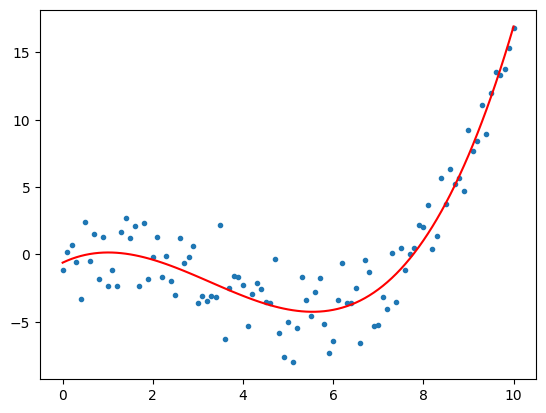

[-0.6120002833896231, 1.5925424606365848, -0.9311276847473748, 0.09472667563280092]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8ad7192d90>

In [13]:
pol = polyfit(x, y, 3)
yy = polyval(pol,x)
xplot = 0:0.1:10

using PyPlot
plot(x, y, ".")
plot(x,yy,"r")

### Problem 4 - Strings and File Processing

From Think Julia:

> Give me a word with three consecutive double letters. I’ll give you a couple of words that
> almost qualify, but don’t. For example, the word committee, c-o-m-m-i-t-t-e-e. It would be
> great except for the i that sneaks in there. Or Mississippi: M-i-s-s-i-s-s-i-p-p-i. If you
> could take out those i’s it would work. But there is a word that has three consecutive pairs
> of letters and to the best of my knowledge this may be the only word. Of course there are
> probably 500 more but I can only think of one. What is the word?

Write a program to find these words. First download the file <https://github.com/BenLauwens/ThinkJulia.jl/blob/master/data/words.txt> to your computer, and upload it to the datahub in the same directory that you keep your notebook. Then read each line of the file, and if the you find the pattern described above, print the word.

In [14]:
function threeDoubles(str)

    for i = 1 : length(str)
        if i < length(str)
            if str[i] == str[i+1]
                if i+3 ≤ length(str)
                    if str[i+2] == str[i+3]
                        if i+5 ≤ length(str)
                            if str[i+4] == str[i+5]
                                return true
                            end
                        end
                    end
                end
            end
        end
    end 
    
    return false
    
end


for line in eachline("words.txt")
    
    if threeDoubles(line)
        return line
    end
    
end

"bookkeeper"